## LAB 5 - TASK 2 submission. ML 2024-25.
**AUTOENCODERS**

FILL UP THIS BOX WITH YOUR DETAILS

**NAME AND NIP**:

Eryka Liced Rimacuna Castillo 816778

Luis Catalan Salas            774274


The following material is based on the official documentation from Keras and Tensorflow about Autoencoders. For more detailed info or help/hints for some of the questions asked here, you can read:
https://www.tensorflow.org/tutorials/generative/autoencoder
https://blog.keras.io/building-autoencoders-in-keras.html


Copyright 2020 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## 0. Set up

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model

## 1. Train a basic autoencoder
Next you have the code to train a basic autoencoder using the Fashion MNIST  dataset. Each image is 28x28 pixels.
* You can run the current version to see how it works.
* Then, **CHANGE what's necessary** to train it for the CIFAR10 dataset from previous lab (note CIFAR images are 32x32x3, color images, let's **convert to grayscale** with the helper code provided below).

This basic autoencoder only has two Dense layers: an `encoder`, which compresses the images into a 64 dimensional latent vector, and a `decoder`, that reconstructs the original image from the latent space.

The model is trained using `x_train` as both the input and the target. The `encoder` will learn to compress the dataset from the initial dimensions (all the input pixels *streched out* as a single vector) to the latent space (64), and the `decoder` will learn to reconstruct the original images.


This is what you would get with the Fashion-MNIST dataset
![Basic autoencoder results](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/generative/images/intro_autoencoder_result.png?raw=1)


In [ ]:
# LOAD the data

# TO-DO LAB5: modify a few things when you want to train with CIFAR 10

# helper function to convert your images to grayscale
def grayscale(data, dtype='float32'):
    # luma coding weighted average in video systems to get grayscale
    r, g, b = np.asarray(.3, dtype=dtype), np.asarray(.59, dtype=dtype), np.asarray(.11, dtype=dtype)
    rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
    # add channel dimension
    rst = np.expand_dims(rst, axis=3)
    return rst

# TO-DO: CHANGE THIS CODE TO LOAD CIFAR 10
# (x_train, _), (x_test, _) = fashion_mnist.load_data()
(x_train, _), (x_test, _) = cifar10.load_data()


# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# TO-DO: if you want to CONVERT TO GRAYSCALE
x_train = grayscale(x_train)
x_test = grayscale(x_test)

print (x_train.shape)
print (x_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step
(50000, 32, 32, 1)
(10000, 32, 32, 1)


In [ ]:
# DEFINE the autoencoder model, compile it and train

# **************************************
# TO-DO LAB5: modify what's necesary in this class to make it a valid
# auto-encoder for CIFAR-10 images in grayscale
# **************************************

latent_dim = 64

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(32 * 32, activation='sigmoid'),
      layers.Reshape((32, 32, 1))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))
print(autoencoder.summary())

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0331 - val_loss: 0.0160
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0148 - val_loss: 0.0138
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0136 - val_loss: 0.0135
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0134 - val_loss: 0.0135
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0135 - val_loss: 0.0135
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0134 - val_loss: 0.0133
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0132 - val_loss: 0.0131
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0130 - val_loss: 0.0130
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0130 - val_loss: 0.0133
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0130 - val_loss: 0.0130


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 32, 32, 1)           │          66,560 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 396,482 (1.51 MB)

 Trainable params: 132,160 (516.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 264,322 (1.01 MB)

None


Now that the model is trained, let's test it by encoding and decoding images from the test set.

In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

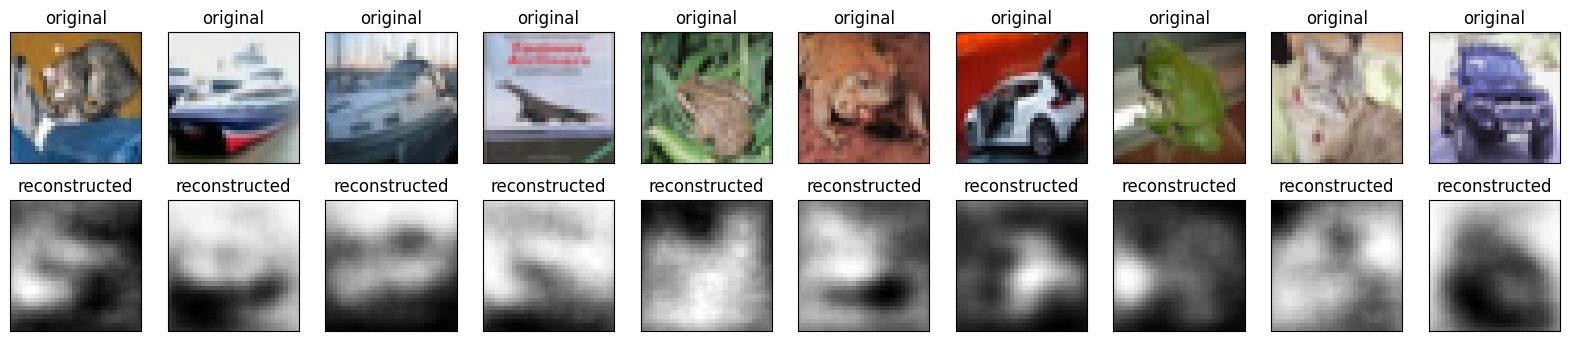

In [ ]:
def plot_results(x_test, decoded_imgs):
  n = 10
  plt.figure(figsize=(20, 4))
  for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    #plt.imshow(x_test[i][:,:,0])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()

plot_results(x_test, decoded_imgs)

## 2. Now make the autoencoder CONVOLUTIONAL

The basic auto-encoder gets a decent work for such a simple model, but very blurred reconstructiosn. Let's train a convolutional autoencoder using  [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) layers in the `encoder`, and [Conv2DTranspose](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose) layers in the `decoder`.


**TO-DO LAB5:**
* Use the gray-scale CIFAR-10 images from previous step 1.
* Fill the empty gaps to finish the definition of the Convolutional autoencoder

* Can you adapt the autoencoder to work with color images? Starting from a copy of the current AutoEncoderCONV class, program a new class *AutoEncoderCONV_COLOR*, train it and visualize some examples.

* Can you make the internal encoding of the image to be half size of what it is right now? Starting from a copy of the current AutoEncoderCONV class, program a new class *AutoEncoderCONV_SMALL*, train it and visualize some examples.



In [ ]:
# let's reload the data in the right format for the CNN
# If you want to work with color images, re-load in color and do not apply the grayscale conversion for this version
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
#(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# TO-DO: if you want to CONVERT TO GRAYSCALE
x_train_gray = grayscale(x_train)
x_test_gray = grayscale(x_test)

print(x_train.shape)
print(x_test.shape)
print(x_train_gray.shape)
print(x_test_gray.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 32, 32, 1)
(10000, 32, 32, 1)


In [ ]:
# DEFINITION OF THE AUTO-ENCODER

class AutoEncoderCONV_GRAY(Model):
  def __init__(self):
    super(AutoEncoderCONV_GRAY, self).__init__()

    # The encoder just consists of 2 convolutional layers.
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(32, 32, 1)),
      layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)])

    # The decoder just consists of 2 convolutional layers
    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

class AutoEncoderCONV_COLOR(Model):
    def __init__(self):
        super(AutoEncoderCONV_COLOR, self).__init__()

        # The encoder for color images (3 channels)
        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(32, 32, 3)),
            layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=2),
            layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2)
        ])

        # The decoder for color images (3 channels output)
        self.decoder = tf.keras.Sequential([
            layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2D(3, kernel_size=(3, 3), activation='sigmoid', padding='same')
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

class AutoEncoderCONV_SMALL(Model):
    def __init__(self):
        super(AutoEncoderCONV_SMALL, self).__init__()

        # Encoder: More aggressive downsampling
        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(32, 32, 1)),
            layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),  # Fewer filters
            layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=4)  # Fewer filters
        ])

        # Decoder: Match the downsampling with fewer filters
        self.decoder = tf.keras.Sequential([
            layers.Conv2DTranspose(8, kernel_size=3, strides=4, activation='relu', padding='same'),
            layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Instantiate the model

#autoencoder = AutoEncoderCONV_COLOR()
autoencoderGRAY = AutoEncoderCONV_GRAY()
autoencoderCOLOR = AutoEncoderCONV_COLOR()
autoencoderSMALL = AutoEncoderCONV_SMALL()

In [ ]:
autoencoderGRAY.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoderCOLOR.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoderSMALL.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
# OPTIONAL CODE. NOT REQUIRED. Run it if you want to load the TensorBoard notebook extension and add the callback to the training.
# What it does is to save a log of what's happening to visualize plots to monitor the training

#%load_ext tensorboard

#import datetime, os
#logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

#%tensorboard --logdir logs

#tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
# more details to configure this here:
# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard

In [ ]:
print(x_train.shape)
print(x_test.shape)

autoencoderGRAY.fit(x_train_gray, x_train_gray,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_gray, x_test_gray))

# if you want to visualize tensorboard plots life while it trains, you can try to use this version instead:
#autoencoder.fit(x_train, x_train,
#                epochs=10, shuffle=True,
#                validation_data=(x_test, x_test),
#                callbacks=[tensorboard_callback])

(50000, 32, 32, 3)
(10000, 32, 32, 3)
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.0155 - val_loss: 0.0028
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0026 - val_loss: 0.0020
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0010 - val_loss: 9.5033e-04
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 9.3553e-04 - val_loss: 8.8325e-04
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 8.8334e-04 - val_loss: 9.1636e-04
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 8.4281e-04 - val_loss: 7.9894e-04


In [ ]:
autoencoderCOLOR.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0148 - val_loss: 0.0029
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0027 - val_loss: 0.0019
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 9.9398e-04 - val_loss: 8.8113e-04
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 8.9404e-04 - val_loss: 8.2420e-04
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 8.1985e-04 - val_loss: 7.5205e-04
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 7.6032e-04 - val_loss: 7.1370e-04
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 7.2576e-04 - val_loss: 6.8625e-04


In [ ]:
autoencoderSMALL.fit(x_train_gray, x_train_gray,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_gray, x_test_gray))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0180 - val_loss: 0.0064
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0062 - val_loss: 0.0058
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0059 - val_loss: 0.0058
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0058 - val_loss: 0.0058
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0057 - val_loss: 0.0058
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0057 - val_loss: 0.0056
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0057 - val_loss: 0.0056
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0056 - val_loss: 0.0057
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0056 - val_loss: 0.0055
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0055 - val_loss: 0.0055


### **QUESTION 1**:
The encoder reduces the size of the input, and then the decoder upsamples back to 32x32. What's the size of the latent encoding obtained by the network for one of the input 32x32 patches?. What would be the maximum encoding size that would make sense to you? why?

ANSWER:

The latent encoding size for a 32x32 input depends on the model. For the grayscale autoencoder, it's 8x8x8, and for the color autoencoder, it's 8x8x16. The maximum sensible encoding size is around 16x16x32, as it retains essential spatial and feature information while offering meaningful compression. Larger sizes risk reducing the compression benefits, approaching the original input size and diminishing the purpose of an autoencoder.

In [ ]:
# write any code you may need to help you get this question answers
# (e.g. the summary of all both encoder/decoder is a good way to explore this)

print(autoencoderGRAY.summary())
print(autoencoderCOLOR.summary())
print(autoencoderSMALL.summary())



Model: "auto_encoder_conv_gray_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_20 (Sequential)           │ (None, 8, 8, 8)             │           1,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_21 (Sequential)           │ (None, 32, 32, 1)           │           1,897 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,653 (37.71 KB)

 Trainable params: 3,217 (12.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,436 (25.14 KB)

None


Model: "auto_encoder_conv_color_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_22 (Sequential)           │ (None, 8, 8, 16)            │           5,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_23 (Sequential)           │ (None, 32, 32, 3)           │           7,827 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,043 (156.42 KB)

 Trainable params: 13,347 (52.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,696 (104.29 KB)

None


Model: "auto_encoder_conv_small_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_24 (Sequential)           │ (None, 4, 4, 8)             │           1,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_25 (Sequential)           │ (None, 32, 32, 1)           │           1,897 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,653 (37.71 KB)

 Trainable params: 3,217 (12.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,436 (25.14 KB)

None


### **QUESTION 2**: Plot a few pairs of images: original vs recovered by the network

**Save one of these plots for each of the three auto-encoders trained** (Required the basic grayscale one. If you want to have full score for this task, you need the other two modifications proposed: color images and/or smaller size of the internal encoding of the image).

In [ ]:
#encoded_imgs = autoencoder.encoder(x_test).numpy()
#decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [ ]:
# in case you can't believe how good it looks ...
# substract the images to verify they are not just identical by mistake :-)
# print(x_test.shape, encoded_imgs.shape, decoded_imgs.shape)
# aux = x_test[0]-decoded_imgs[0]
# print("Sum of differences per pixel for one example {} ".format(np.sum(np.sum(aux))))

Autoencoder GRAYSCALE


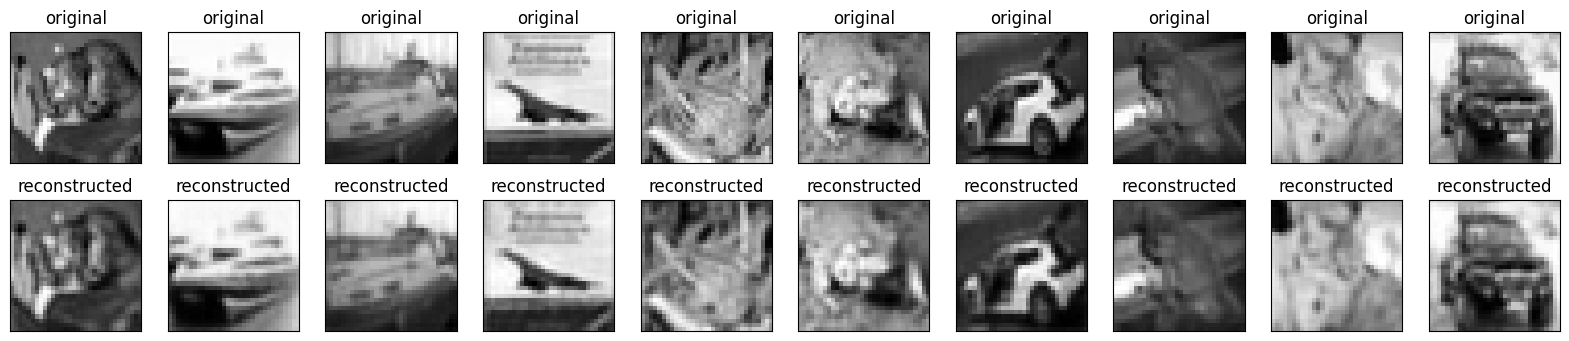

Autoencoder COLOR


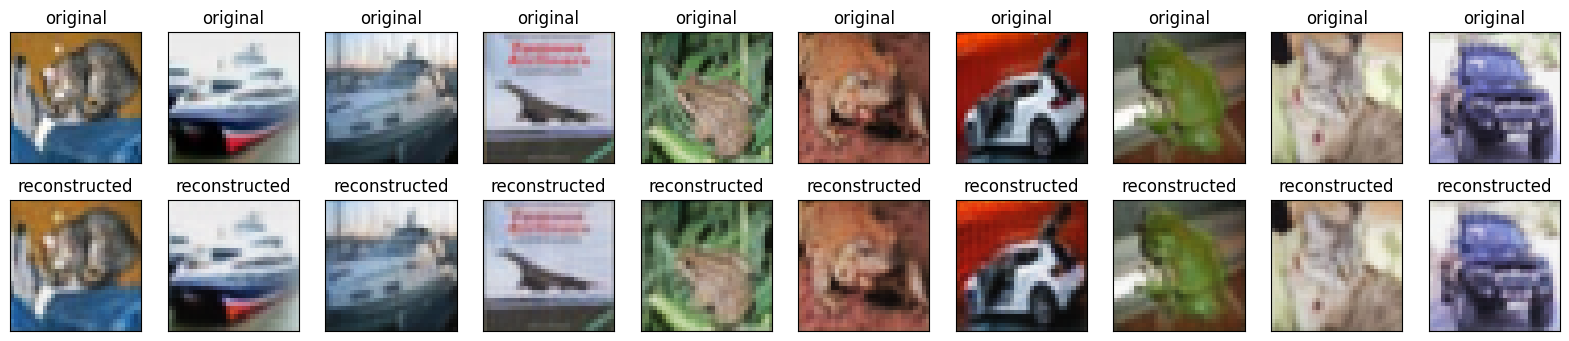

Autoencoder SMALL


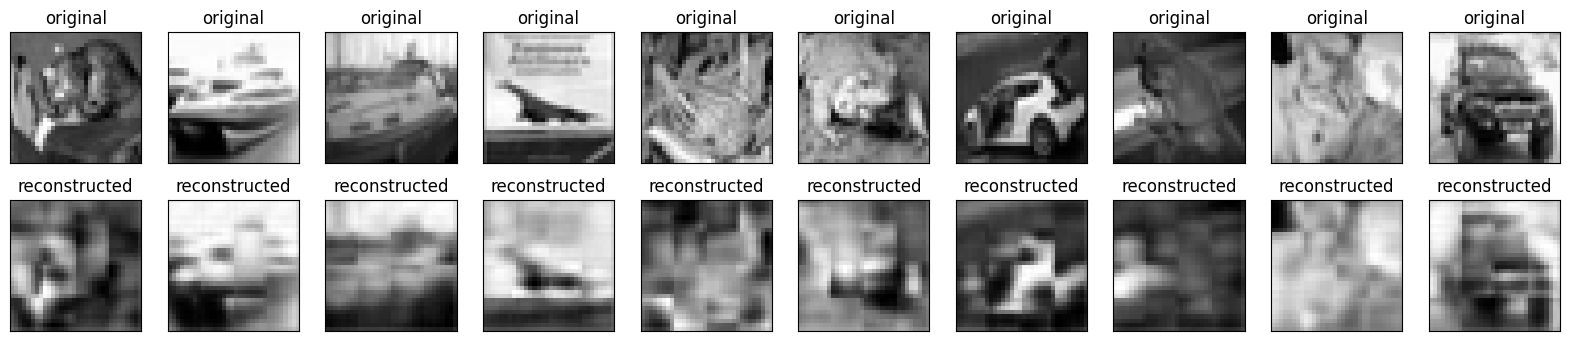

In [ ]:
encoded_imgsGRAY = autoencoderGRAY.encoder(x_test_gray).numpy()
decoded_imgsGRAY = autoencoderGRAY.decoder(encoded_imgsGRAY).numpy()
encoded_imgsCOLOR = autoencoderCOLOR.encoder(x_test).numpy()
decoded_imgsCOLOR = autoencoderCOLOR.decoder(encoded_imgsCOLOR).numpy()
encoded_imgsSMALL = autoencoderSMALL.encoder(x_test_gray).numpy()
decoded_imgsSAMLL = autoencoderSMALL.decoder(encoded_imgsSMALL).numpy()

print("Autoencoder GRAYSCALE")
plot_results(x_test_gray, decoded_imgsGRAY)
print("Autoencoder COLOR")
plot_results(x_test, decoded_imgsCOLOR)
print("Autoencoder SMALL")
plot_results(x_test_gray, decoded_imgsSAMLL)

## 3. Anomaly detection using autoencoders

Let's see a different example, with other data types. You will train a deep autoencoder now to detect anomalies on the [ECG5000 dataset](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000). This dataset contains 5,000 [Electrocardiograms](https://en.wikipedia.org/wiki/Electrocardiography), each with 140 data points. We use a simplified version of the dataset, where each example has been labeled either `0` (corresponding to an abnormal rhythm), or `1` (corresponding to a normal rhythm).

*How could you detect anomalies in large datasets using an autoencoder if you wouldn't have annotated data?* (now we will use the labels to verify the quality of what we're getting).

An autoencoder is trained to minimize reconstruction error, so we will train an autoencoder on the normal rhythms only, then use it to reconstruct all the data. The hypothesis is that the abnormal rhythms will have higher reconstruction error, so we can identify a rhythm as an anomaly if the reconstruction error surpasses a fixed threshold.

### Load ECG data

The dataset you will use is based on one from [timeseriesclassification.com](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000).


In [ ]:
# Download the dataset
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
# visualize a few values:
# dataframe.head()


In [ ]:
# Prepare the data

# The last element contains the labels, the rest is the electrocadriogram data
labels = raw_data[:, -1]
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

# Normalize the data to [0,1]
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

# SPLIT the normal (label 1) and abnormal (label 0) rhythms data
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

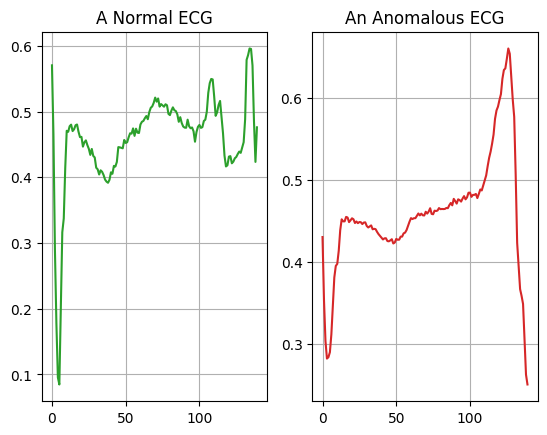

In [ ]:
# Plot an example of normal and abnormal ECG
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(np.arange(140), normal_train_data[0], 'tab:green')
ax1.set_title('A Normal ECG')
ax1.grid()
ax2.plot(np.arange(140), anomalous_train_data[0], 'tab:red')
ax2.set_title("An Anomalous ECG")
ax2.grid()

### Build the model

### **QUESTION 3:** Finish the **implementation** of the auto-encoder.
It should learn a latent **representation of 8 values**. We want the network to have 3 Dense layers as encoder and 3 Dense layers as decoder, with **less than 6000 parameters** in total.

How many parameters has your first dense layer? Can you tell how is that number computed?


ANSWER 1:
The number of parameters in the first dense layer is computed as:
parameters = (input_dim × units) + bias. For example, if the input size is 140 and the layer has 64 units, the parameters are: 140 × 64 + 64 = 9024.

In [ ]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()

    # Encoder: 3 Dense layers with 128, 64, and 8 units
    self.encoder = tf.keras.Sequential([
        layers.Input(shape=(140,)),  # input layer, shape (140,)
        layers.Dense(128, activation="relu"),  # First dense layer (128 units)
        layers.Dense(64, activation="relu"),   # Second dense layer (64 units)
        layers.Dense(8, activation="relu")     # Latent representation (8 values)
    ])

    # Decoder: 3 Dense layers, mirror of encoder (64, 128, 140)
    self.decoder = tf.keras.Sequential([
        layers.Dense(64, activation="relu"),   # First dense layer (64 units)
        layers.Dense(128, activation="relu"),  # Second dense layer (128 units)
        layers.Dense(140, activation="sigmoid")  # Output layer (140 values, sigmoid activation)
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

# Instantiate the autoencoder
autoencoder = AnomalyDetector()

# Compile the model
autoencoder.compile(optimizer='adam', loss='mae')


Notice that the autoencoder is trained using only the normal ECGs, but it is evaluated using the full **test set**.

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0595 - val_loss: 0.0524
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0541 - val_loss: 0.0478
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0452 - val_loss: 0.0461
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0376 - val_loss: 0.0402
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0320 - val_loss: 0.0397
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0292 - val_loss: 0.0374
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0268 - val_loss: 0.0365
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0247 - val_loss: 0.0353
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0239 - val_loss: 0.0346
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0229 - val_loss: 0.0341
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0218 - val_loss: 0.0336
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0210 - val_loss: 0.0337
E

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 128)                 │          18,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 8)                   │             520 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,824 (104.78 KB)

 Trainable params: 26,824 (104.78 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 140)                 │          18,060 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,956 (105.30 KB)

 Trainable params: 26,956 (105.30 KB)

 Non-trainable params: 0 (0.00 B)

Model: "anomaly_detector"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_10 (Sequential)           │ (None, 8)                   │          26,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_11 (Sequential)           │ (None, 140)                 │          26,956 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161,342 (630.25 KB)

 Trainable params: 53,780 (210.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 107,562 (420.17 KB)

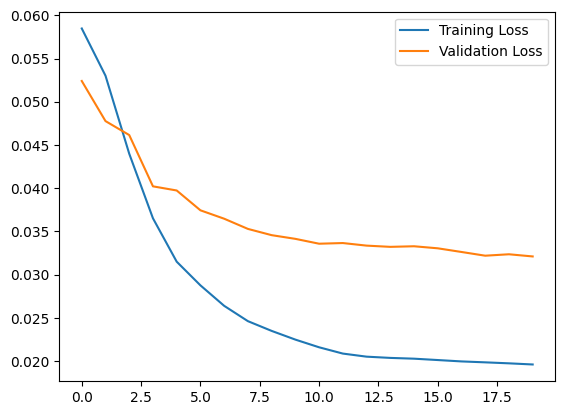

In [ ]:
history = autoencoder.fit(normal_train_data, normal_train_data,
          epochs=20,
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

autoencoder.encoder.summary()
autoencoder.decoder.summary()
autoencoder.summary()

Let's visualize some results (original ECG, reconstruction after it's encoded and decoded by the autoencoder, and the reconstruction error) for normal and abnormal ECG examples

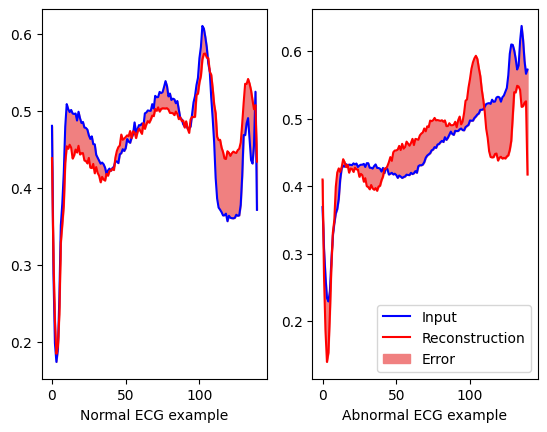

In [ ]:
# normal ECG
encoded_ecgs = autoencoder.encoder(normal_test_data).numpy()
decoded_ecgs = autoencoder.decoder(encoded_ecgs).numpy()

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(normal_test_data[0],'b')
ax1.plot(decoded_ecgs[0],'r')
ax1.fill_between(np.arange(140), decoded_ecgs[0], normal_test_data[0], color='lightcoral' )
ax1.set_xlabel("Normal ECG example")

# abnormal ECG
encoded_ecgs = autoencoder.encoder(anomalous_test_data).numpy()
decoded_ecgs = autoencoder.decoder(encoded_ecgs).numpy()

ax2.plot(anomalous_test_data[0],'b')
ax2.plot(decoded_ecgs[0],'r')
ax2.fill_between(np.arange(140), decoded_ecgs[0], anomalous_test_data[0], color='lightcoral' )
ax2.set_xlabel("Abnormal ECG example")
ax2.legend(labels=["Input", "Reconstruction", "Error"])


### Detect anomalies

To *detect* anomalies we'll see if the reconstruction loss is greater than a fixed threshold. In this example, one standard deviation from the mean average error for normal examples in the training set.

Plot the reconstruction error on normal ECGs from the training set and on abnormal ECGs from the test set. Let's also compute the average error on trainin data to establish our *normality* threshold.

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Threshold to be considered a normal ECG:  0.03103548
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Text(0.5, 0, 'Error in TEST (anomalous) images')

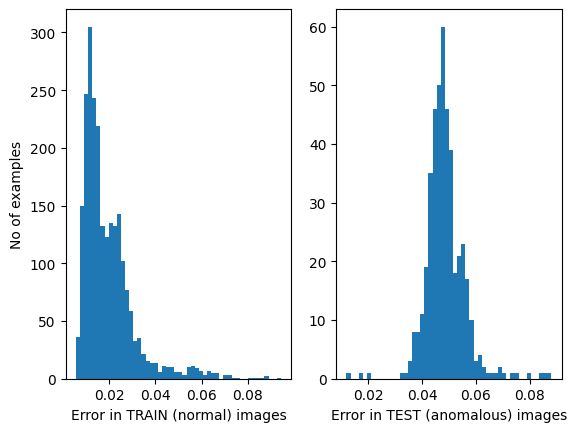

In [ ]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold to be considered a normal ECG: ", threshold)

reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(train_loss, bins=50)
ax1.set_xlabel("Error in TRAIN (normal) images")
ax1.set_ylabel("No of examples")

ax2.hist(test_loss, bins=50)
ax2.set_xlabel("Error in TEST (anomalous) images")


Classify an ECG as an anomaly if the reconstruction error is greater than the threshold. By varing this threshold, you can adjust the precision and recall of your classifier.

### **QUESTION 4:**
* In this particular example, you are predicting possible abnormal ECG. What would you prefer to maximize? Precision or Recall? Explain why.
* Besides, in order to analyze in more detail the results here, estimate how much normal ECG has been predicted as abnormal and viceversa? (if you need additional code, add it to the final code cell)

ANSWER 2:

In this case, Recall should be maximized. Recall is critical because we want to ensure that as many abnormal ECGs (anomalies) as possible are identified. Precision could be less important in this context, as false positives (normal ECGs classified as abnormal) are less harmful and can be manually reviewed.

To estimate how much normal ECG has been predicted as abnormal and vice versa, we would use a confusion matrix, which will give us the false positives (normal ECGs predicted as abnormal) and false negatives (abnormal ECGs predicted as normal).

In [ ]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {0:.3f}".format(accuracy_score(labels, preds)))
  print("Precision = {0:.3f}".format(precision_score(labels, preds)))
  print("Recall = {0:.3f}".format(recall_score(labels, preds)))

In [ ]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.944
Precision = 0.994
Recall = 0.905


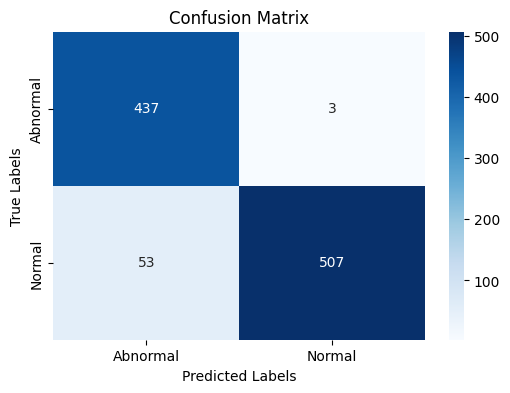

True Negatives (normal ECG predicted as normal): 437
False Positives (normal ECG predicted as abnormal): 3
False Negatives (abnormal ECG predicted as normal): 53
True Positives (abnormal ECG predicted as abnormal): 507


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(test_labels, preds)
tn, fp, fn, tp = cm.ravel()

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Abnormal', 'Normal'], yticklabels=['Abnormal', 'Normal'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print(f"True Negatives (normal ECG predicted as normal): {tn}")
print(f"False Positives (normal ECG predicted as abnormal): {fp}")
print(f"False Negatives (abnormal ECG predicted as normal): {fn}")
print(f"True Positives (abnormal ECG predicted as abnormal): {tp}")